<a href="https://colab.research.google.com/github/friedelj/AAI-510-TEAM-03/blob/main/JFriedel_CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joseph Friedel----------------------Assignment #2-----------------------11/4/24

In [1]:
import tensorflow as tf
print(tf.version.VERSION)
device_name=tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.17.0
Found GPU at: /device:GPU:0


In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [4]:
import urllib.request

# URL of the MNIST dataset
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
# File path where the dataset will be saved
filename = "mnist.npz"

# Download the dataset
urllib.request.urlretrieve(url, filename)

print("Download complete. Saved as", filename)

Download complete. Saved as mnist.npz


In [5]:
# Create train and test dataset
import numpy as np

with np.load("mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

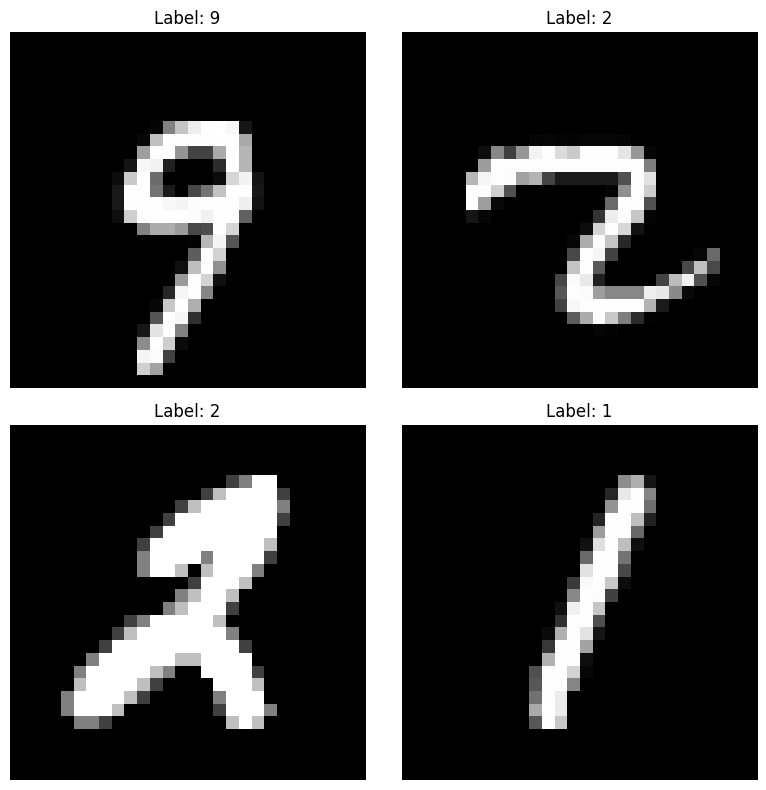

In [6]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints
import matplotlib.pyplot as plt

# Load the MNIST dataset
with np.load("mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']

# Plot 4 random samples from the dataset
plt.figure(figsize=(8, 8))
for i in range(4):
    # Choose a random index
    index = np.random.randint(0, x_train.shape[0])

    # Display the image
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

# Encode the output labels using one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.7701 - loss: 0.6982 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9843 - val_loss: 0.0480
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9907 - val_loss: 0.0293
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9865 - val_loss: 0.0465
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9924 - val_loss: 0.0279
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9934 - loss: 0

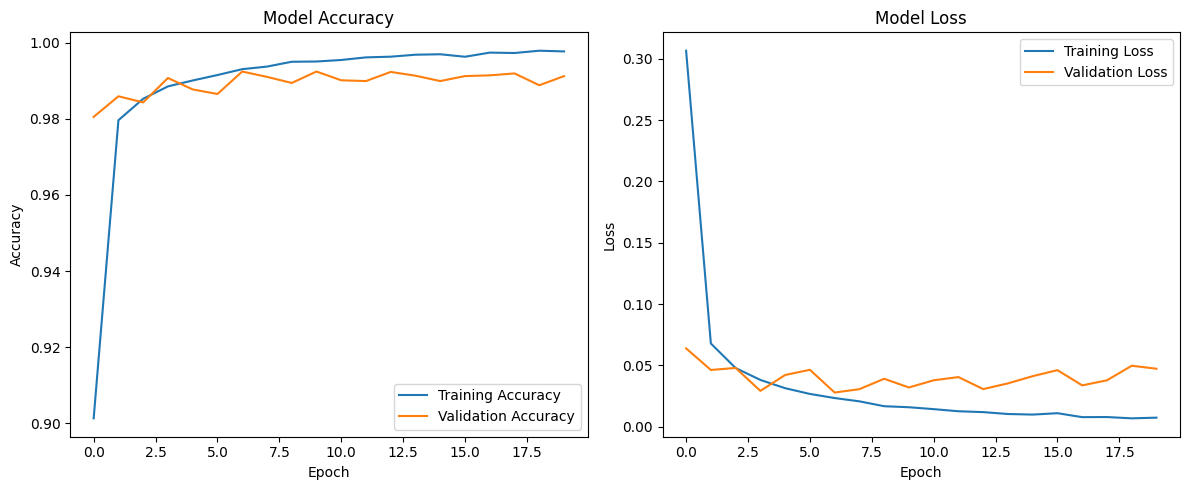

In [10]:
#1.b.
# Create model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define the CNN model
model = Sequential()

# First convolutional layer (32 filters)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer (32 filters)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer (64 filters) - No pooling layer here to maintain size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Fourth convolutional layer (64 filters) - No pooling layer here to maintain size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Plot the learning curve
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

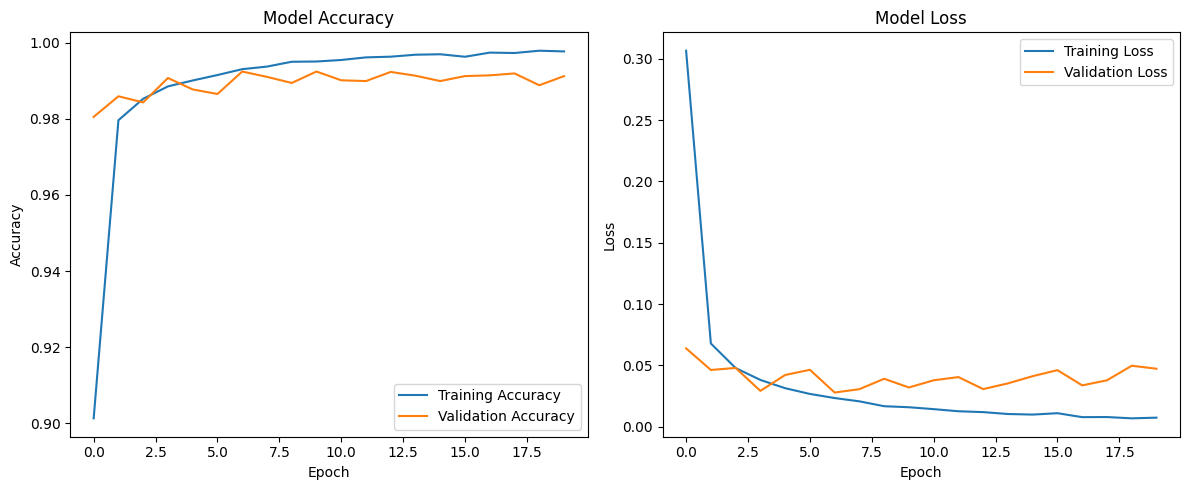

In [11]:
# Draw Learning curve
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves

# Define the learning curve function
def learning_curve(hist):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the learning curve function
learning_curve(history)

## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about.
I agree.  0.98 accuracy is really good.  The lower validation accuracy shows slight overfitting.  I would try fewer epochs.